In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("cleaned_ufo_data.csv")
df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


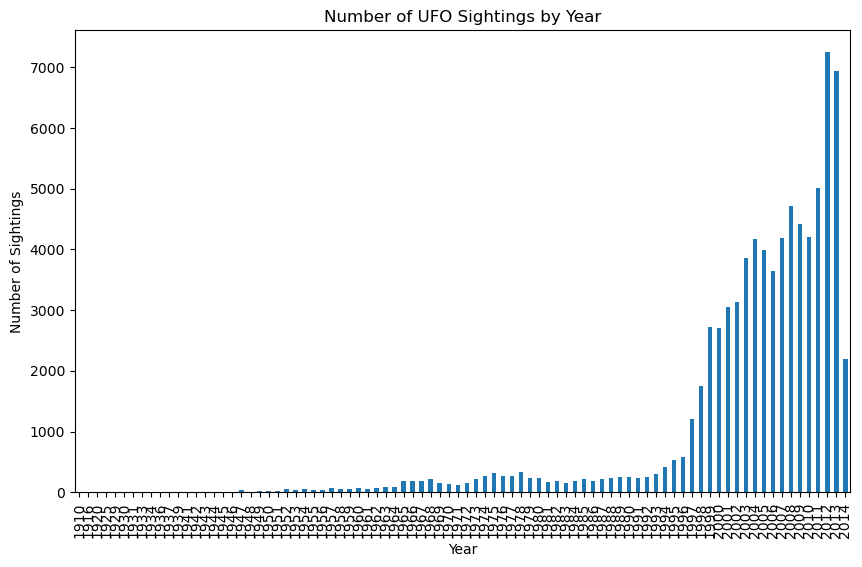

In [3]:
import matplotlib.pyplot as plt

# Plot the number of UFO sightings by year
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()

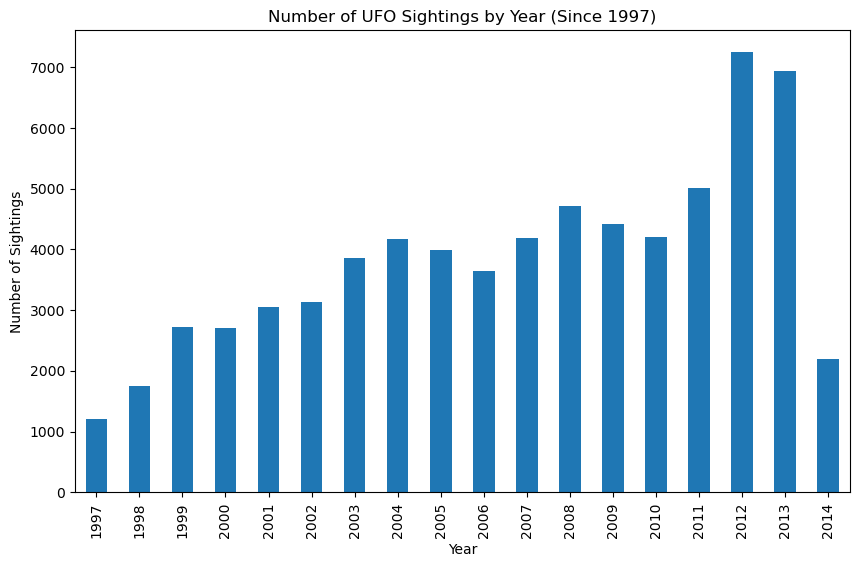

In [4]:
# Filter UFO sightings since 1997
df_since_1997 = df[df['Year'] >= 1997]

# Plot the number of UFO sightings by year since 1997
df_since_1997['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of UFO Sightings by Year (Since 1997)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()

In [5]:
# Find the first year of a recorded UFO sighting
first_year = df['Year'].min()

print(f"The first year of a recorded UFO sighting is: {first_year}")

The first year of a recorded UFO sighting is: 1910


In [6]:
# Filter UFO sightings from 1910 to 1996
df_1910_to_1996 = df[(df['Year'] >= 1910) & (df['Year'] <= 1996)]

# Calculate the total number of recorded UFO sightings
total_sightings_1910_to_1996 = len(df_1910_to_1996)

print(f"The total number of recorded UFO sightings from 1910 to 1996 is: {total_sightings_1910_to_1996}")

The total number of recorded UFO sightings from 1910 to 1996 is: 8661


In [7]:
# Filter UFO sightings from 1997 to 2014
df_1997_to_2014 = df[(df['Year'] >= 1997) & (df['Year'] <= 2014)]

# Calculate the total number of recorded UFO sightings
total_sightings_1997_to_2014 = len(df_1997_to_2014)

print(f"The total number of recorded UFO sightings from 1997 to 2014 is: {total_sightings_1997_to_2014}")

The total number of recorded UFO sightings from 1997 to 2014 is: 69176


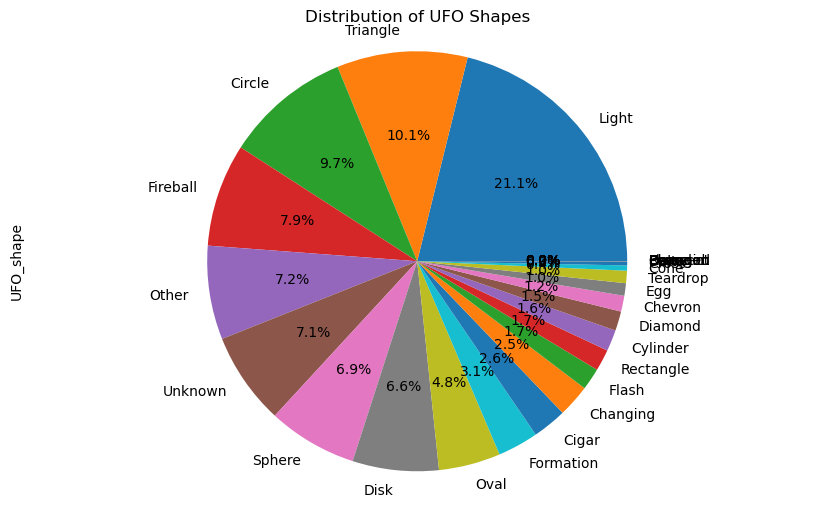

In [8]:
# Plot the distribution of UFO shapes
df['UFO_shape'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))
plt.title('Distribution of UFO Shapes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# List out all unique UFO shapes
shape_counts = df['UFO_shape'].value_counts()

print("UFO Shapes with Counts:")
print(shape_counts)

UFO Shapes with Counts:
Light        16451
Triangle      7826
Circle        7546
Fireball      6172
Other         5616
Unknown       5540
Sphere        5356
Disk          5162
Oval          3703
Formation     2438
Cigar         2042
Changing      1944
Flash         1315
Rectangle     1289
Cylinder      1273
Diamond       1165
Chevron        947
Egg            751
Teardrop       742
Cone           311
Cross          232
Delta            7
Round            2
Crescent         2
Pyramid          1
Flare            1
Hexagon          1
Dome             1
Changed          1
Name: UFO_shape, dtype: int64


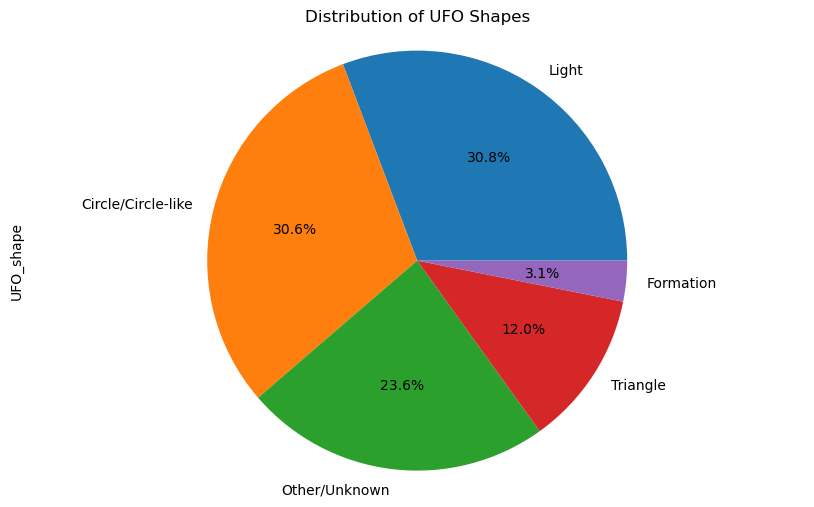

In [10]:
# Combine 'circle', 'sphere', 'cylinder', 'oval', 'egg', 'round', 'disk' into 'Circle/circle-like'
df['UFO_shape'] = df['UFO_shape'].replace({'Circle': 'Circle/Circle-like',
                                                           'Sphere': 'Circle/Circle-like',
                                                           'Cylinder': 'Circle/Circle-like',
                                                           'Oval': 'Circle/Circle-like', 
                                                           'Egg': 'Circle/Circle-like', 
                                                           'Round': 'Circle/Circle-like',
                                                           'Disk': 'Circle/Circle-like'})

# Combine Unknown, Other, delta, crescent, flare, hexagon, dome, changed, cross, teardrop, chevron, rectangle into Other/Unknown
df['UFO_shape'] = df['UFO_shape'].replace({'Other': 'Other/Unknown',
                                                           'Unknown': 'Other/Unknown',
                                                           'Delta': 'Other/Unknown',
                                                           'Crescent': 'Other/Unknown', 
                                                           'Flare': 'Other/Unknown',
                                                           'Hexagon': 'Other/Unknown',
                                                           'Dome': 'Other/Unknown',
                                                           'Cross': 'Other/Unknown',
                                                           'Teardrop': 'Other/Unknown',
                                                           'Chevron': 'Other/Unknown',
                                                           'Rectangle': 'Other/Unknown',
                                                           'Changing': 'Other/Unknown',
                                                           'Cigar': 'Other/Unknown',
                                                           'Changed': 'Other/Unknown'})
# Combine 'flash' and 'fireball' into 'Light'
df['UFO_shape'] = df['UFO_shape'].replace({'Flash': 'Light', 'Fireball': 'Light'})

# Combine 'cone' and 'diamond' and 'pyramind' into 'Triangle'
df['UFO_shape'] = df['UFO_shape'].replace({'Cone': 'Triangle', 'Diamond': 'Triangle', 'Pyramid': 'Triangle'})

# Plot the distribution of UFO shapes
df['UFO_shape'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6))
plt.title('Distribution of UFO Shapes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\yvedu\anaconda3\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


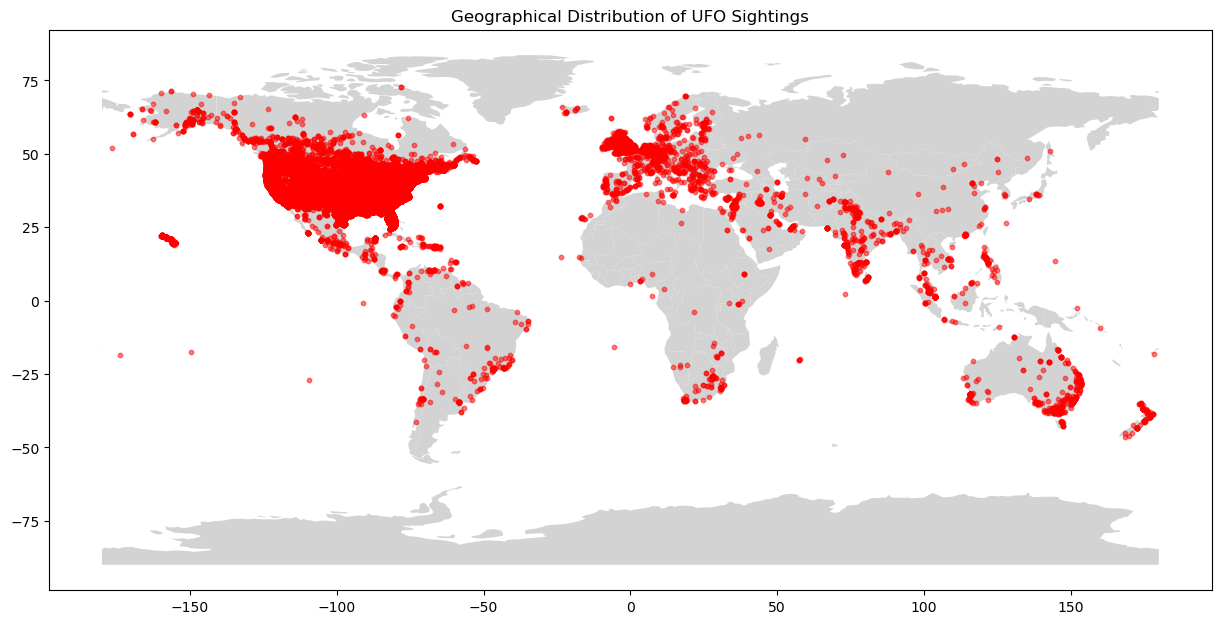

In [11]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for geographical plotting
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the geographical distribution of UFO sightings
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Geographical Distribution of UFO Sightings')
plt.show()


In [12]:
# Find the country with the most UFO sightings
most_sightings_country = df['Country'].value_counts().idxmax()

print(f"The country with the most UFO sightings is: {most_sightings_country}")

The country with the most UFO sightings is: United States


In [13]:
# List out countries with counts of UFO sightings
country_counts = df['Country'].value_counts()

print("Countries with Counts of UFO Sightings:")
print(country_counts)

Countries with Counts of UFO Sightings:
United States              69139
Canada                      3530
United Kingdom              2289
Australia                    586
India                        211
                           ...  
Saint Lucia                    1
Solomon Islands                1
Fiji                           1
Algeria                        1
Palestinian Territories        1
Name: Country, Length: 136, dtype: int64


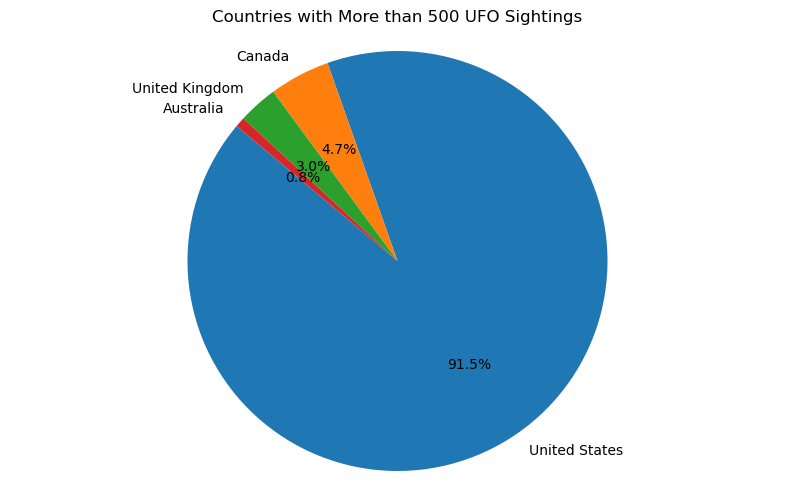

In [18]:
# Get country counts
country_counts = df['Country'].value_counts()

# Filter countries with more than 500 sightings
filtered_countries = country_counts[country_counts > 500]

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(filtered_countries, labels=filtered_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Countries with More than 500 UFO Sightings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

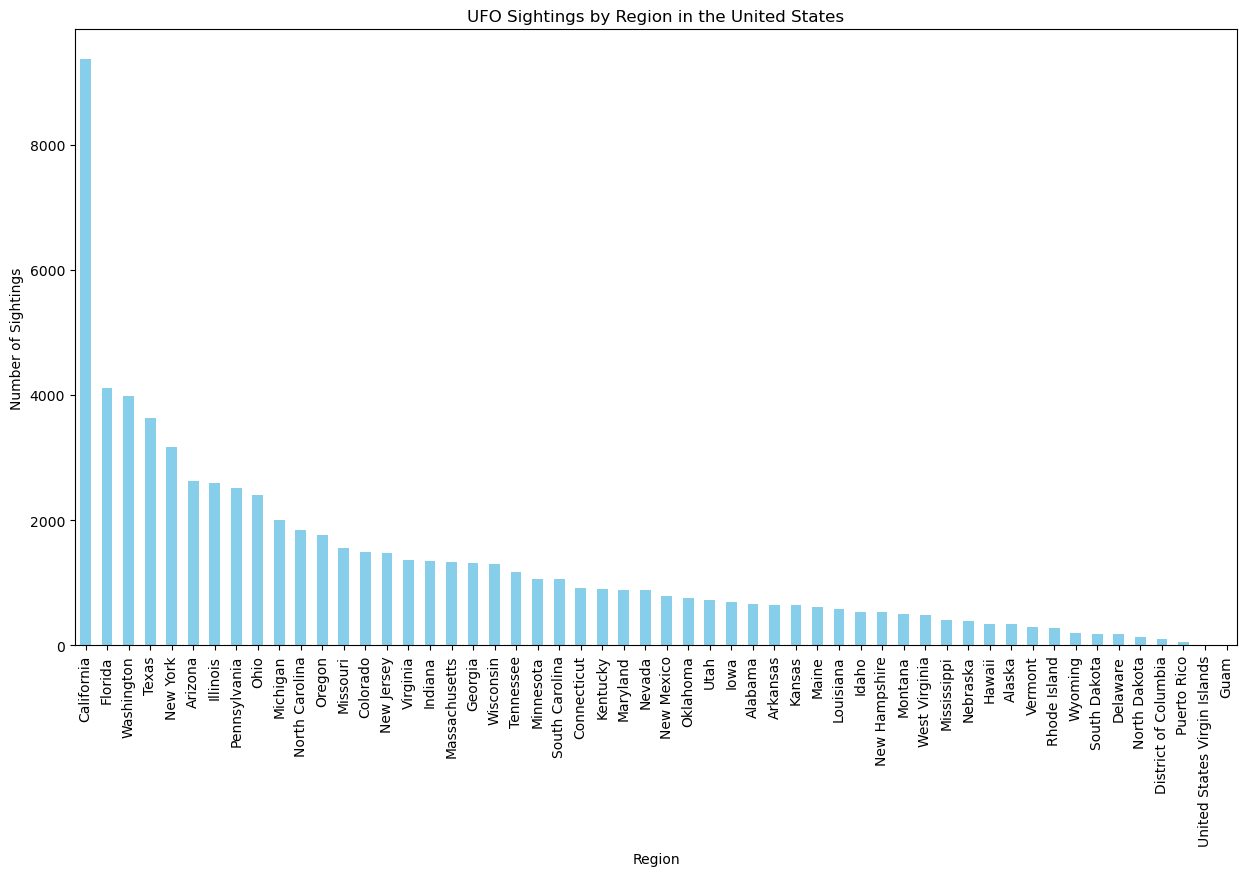

In [20]:
# Filter data for UFO sightings in the United States
df_us = df[df['Country'] == 'United States']

# Plot the bar graph for regions in the United States with UFO sightings
plt.figure(figsize=(15, 8))
df_us['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Region in the United States')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.show()